In [1]:
import numpy as np
from scipy.stats import norm #нормальний розподіл 
from scipy.stats import t #розподіл Стьюдента
from scipy.stats import chi2 #розподіл Хі-квадрат
from scipy.stats import uniform #рівномірний розподіл
import math
import itertools
from scipy import random
import gmpy2
from gmpy2 import mpfr
import matplotlib.pyplot as plt
import time

# Завдання 1

In [4]:
gamma = 0.005
Z_gamma = 2.575

n1 = 100
n2 = 10000
n3 = 1000000

def gen_norm_values(n):
    vals = norm.rvs(size = n)
    X = np.sum(vals) / n  #вибіркове середнє
    S = np.sum([(i - X)**2 for i in vals]) / n #вибіркова дисперсія
    plt.figure(figsize=(4,2.5))
    plt.hist(vals,30, density = True)
    plt.title(f"{n} спостережень")
    plt.axvline(X, color='k', linewidth=1)
    plt.show()
    return X, S    

A. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., які мають нормальний розподіл, але дисперсія невідома.

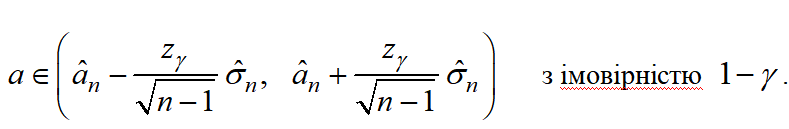

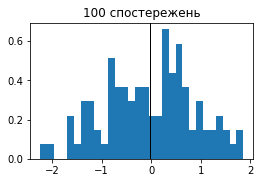

кількість спостережень = 100
вибіркове середнє = -0.022391056466529603
вибіркова дисперсія = 0.8143230746240667
М.С. належить (-0.25592929845594575, 0.21114718552288655) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.4670764839788323



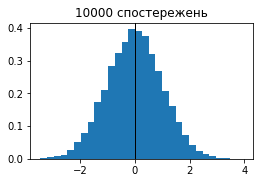

кількість спостережень = 10000
вибіркове середнє = -0.007034130801964303
вибіркова дисперсія = 1.0210936150895913
М.С. належить (-0.03305559495783039, 0.018987333353901785) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.05204292831173218



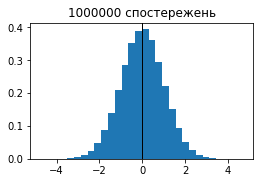

кількість спостережень = 1000000
вибіркове середнє = 0.0006906627891620921
вибіркова дисперсія = 0.9996378909499707
М.С. належить (-0.001883872240490985, 0.0032651978188151694) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.005149070059306154



In [5]:
def interval_for_expected_value_1(n): #довірчий інтервал для матсподівання при невідомій дисперсії
    X, S = gen_norm_values(n)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія =", S)
    print(f"М.С. належить ({left}, {right}) \nз імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_1(n1)
interval_2 = interval_for_expected_value_1(n2)
interval_3 = interval_for_expected_value_1(n3)

B. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., розподіл яких невідомий.
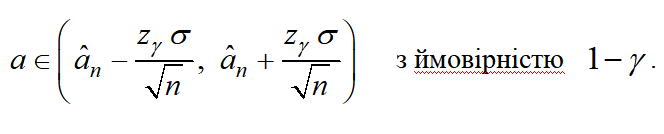

замість дисперсії використали її незміщену оцінку: 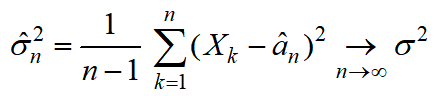

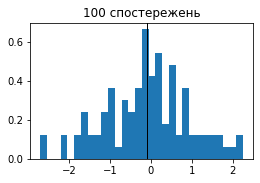

кількість спостережень = 100
вибіркове середнє = -0.09990741943057035
вибіркова дисперсія 1.080813177482444
М.С. належить (-0.36760999459458576, 0.16779515573344506) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.5354051503280308



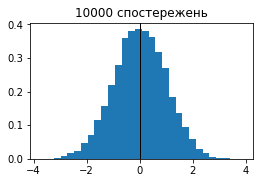

кількість спостережень = 10000
вибіркове середнє = 0.008549099191879565
вибіркова дисперсія 0.9856465239731964
М.С. належить (-0.01701543186781284, 0.03411363025157197) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.05112906211938481



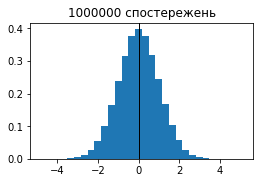

кількість спостережень = 1000000
вибіркове середнє = 0.000676021719124352
вибіркова дисперсія 1.0018078080885562
М.С. належить (-0.0019013047827972, 0.0032533482210459043) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.005154653003843104



In [6]:
def interval_for_expected_value_2(n): #довірчий інтервал для матсподівання при невідомому розподілі
    X, S = gen_norm_values(n)
    S = (S * n) / (n-1)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"М.С. належить ({left}, {right}) \nз імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_2(n1)
interval_2 = interval_for_expected_value_2(n2)
interval_3 = interval_for_expected_value_2(n3)

C. Побудувати довірчий інтервал для дисперсії у припущенні, що
спостерігаються в.в., які мають нормальний розподіл.
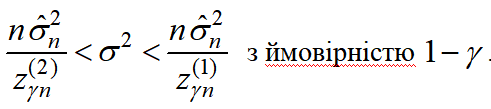

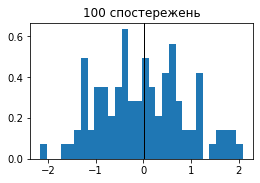

Z1= 64.05614034840946 Z2= 98.2463312377383
кількість спостережень = 100
вибіркове середнє = 0.007881289770924907
вибіркова дисперсія 0.8181872543112505
дисперсія належить (0.8327916615342976, 1.2772971488151275) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.44450548728082984



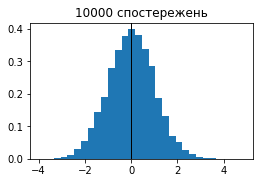

Z1= 9606.629567253261 Z2= 9997.447213469482
кількість спостережень = 10000
вибіркове середнє = -0.000834468760324447
вибіркова дисперсія 1.0013780355858972
дисперсія належить (1.0016337312956736, 1.0423822721335683) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.0407485408378947



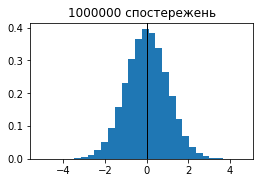

Z1= 996033.8428569597 Z2= 999989.4710402115
кількість спостережень = 1000000
вибіркове середнє = -0.00024877720692113446
вибіркова дисперсія 0.9994223623939249
дисперсія належить (0.9994328853825863, 1.0034020124529561) 
з імовірністю 0.995
довжина довірчого інтервалу = 0.003969127070369782



In [7]:
def interval_for_expected_value_3(n): #довірчий інтервал для дисперсії при нормальному розподілі
    X, S = gen_norm_values(n)
    df = n-1 #ступенів свободи розподілу хі-квадрат
    Z1 = chi2.ppf((gamma)/2, df, loc=0, scale=1)
    Z2 = chi2.ppf((1-gamma)/2, df, loc=0, scale=1)
    print("Z1=", Z1, "Z2=", Z2)
    left = n * S / Z2 
    right = n * S / Z1 
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"дисперсія належить ({left}, {right}) \nз імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_3(n1)
interval_2 = interval_for_expected_value_3(n2)
interval_3 = interval_for_expected_value_3(n3)

# Завдання 2

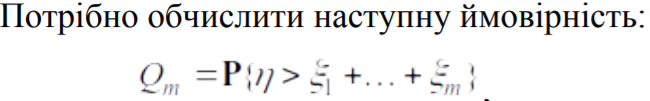


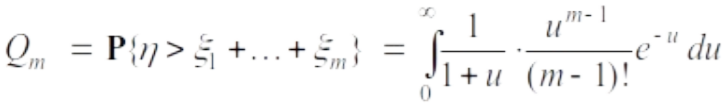


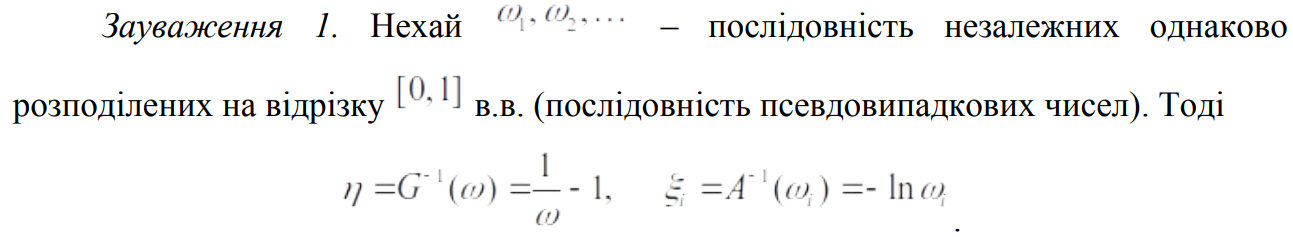

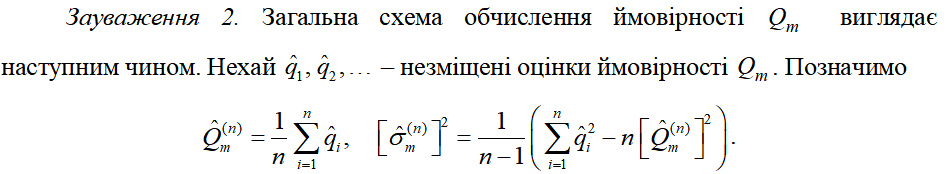

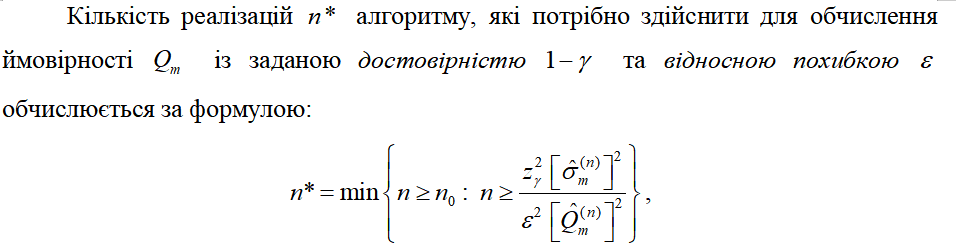

In [9]:
eps = 0.01
Z_gamma = 2.575

m = [1, 10, 65, 100, 1000, 10000]

In [10]:
def gen_uniform_values(n): #генерування w_i
    vals = uniform.rvs(size = n)
    return vals  

### A. Для кожного значення m обчислити точне значення ймовірності  Qm

In [11]:
from scipy import integrate
from sympy import factorial

def true_prob(u):
    fa = factorial(m_ - 1)
    ex = math.exp(-u)
    u_m = np.power(u, np.array(m_-1))
    return ex * u_m / ((1 + u)*fa)

In [12]:
m_ = 1
Q = integrate.quad(true_prob, 0, np.infty)[0]
print("m=", m_)
print("Q=", Q)

m= 1
Q= 0.5963473623231728


In [13]:
m_ = 10
Q = integrate.quad(true_prob, 0, np.infty)[0]
print("m=", m_)
print("Q=", Q)

m= 10
Q= 0.09892913264064612


In [14]:
m_ = 65
Q = integrate.quad(true_prob, 0, np.infty)[0]
print("m=", m_)
print("Q=", Q)

m= 65
Q= 0.015380919879788272


### B.  Стандартний метод Монте-Карло (метод 1)

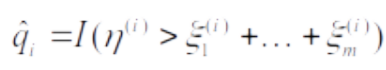

In [15]:
def MonteCarlo_method_1_2(m):
    q_sum = 0
    q2_sum = 0
    Q = 0
    sigma = 0
    n = 0
    n_bound = 10000
    while n < n_bound:
        n += 1
        un = uniform.rvs(size = m)
        xi = (-1)* np.log(un)
        w = uniform.rvs() #для знаходження етта
        while w == 0.0: #якщо раптом згенерується w=0
            w = uniform.rvs()
        eta = (1/w) - 1
        
        if eta > np.sum(xi): #індикатор
            q_i = 1
        else: q_i = 0
        
        q2_sum += q_i**2
        q_sum += q_i
        if n>=2 and q_sum!=0:
            Q = q_sum/n
            Q_2 = Q**2
            sigma = (q2_sum - n*(Q_2)) / (n-1)
            n_bound = (sigma/Q_2) * ((Z_gamma/eps)**2)
    return Q, sigma, n_bound, n



for m_i in m[:3]: 
    start = time.time()
    Q, sigma, n_bound, n = MonteCarlo_method_1_2(m_i)
    end = time.time()
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("вибіркова дисперсія=", sigma)
    print("n_bound=", n_bound)
    print("time=", end - start)
    print("-----------------------------")


m= 1
n= 44690
Q= 0.5973819646453346
вибіркова дисперсія= 0.24052213497423305
n_bound= 44689.48020150134
time= 5.875542640686035
-----------------------------

m= 10
n= 604152
Q= 0.09889729736887405
вибіркова дисперсія= 0.08911676944920582
n_bound= 604150.3818907426
time= 79.82991218566895
-----------------------------

m= 65
n= 4243519
Q= 0.015385108444194547
вибіркова дисперсія= 0.01514841045213049
n_bound= 4243462.876776947
time= 552.0375742912292
-----------------------------


### C (Метод 2)
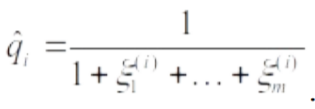

In [16]:
def method_2(m):
    q_sum = 0
    q2_sum = 0
    Q = 0
    sigma = 0
    n = 0
    n_bound = 10
    while n < n_bound:
        n += 1
        un = gen_uniform_values(m)
        xi = (-1)* np.log(un)
        q_i = 1 / (np.sum(xi) + 1)
        
        q2_sum += q_i**2
        q_sum += q_i
        if n>=2:
            Q = q_sum/n
            Q_2 = Q**2
            sigma = (q2_sum - n*(Q_2)) / (n-1)
            n_bound = (sigma/Q_2) * ((Z_gamma/eps)**2)
    return Q, sigma, n_bound, n

for m_i in m: 
    start = time.time()
    Q, sigma, n_bound, n = method_2(m_i)
    end = time.time()
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("виб. дисперсія=", sigma)
    print("n_bound=", n_bound)
    print("time=", end - start)
    print("-----------------------------")


m= 1
n= 9013
Q= 0.5932245008335091
виб. дисперсія= 0.0478285191125669
n_bound= 9011.627712144365
time= 0.7695608139038086
-----------------------------

m= 10
n= 6332
Q= 0.0982929061816963
виб. дисперсія= 0.0009225265806261679
n_bound= 6331.243303279107
time= 0.602656364440918
-----------------------------

m= 65
n= 1056
Q= 0.015484098996623447
виб. дисперсія= 3.815227521073344e-06
n_bound= 1055.1228550026035
time= 0.09894275665283203
-----------------------------

m= 100
n= 647
Q= 0.009954517555216561
виб. дисперсія= 9.647166622327316e-07
n_bound= 645.5261092822019
time= 0.06096601486206055
-----------------------------

m= 1000
n= 47
Q= 0.0010072503876723772
виб. дисперсія= 7.061571349366302e-10
n_bound= 46.15098045847992
time= 0.017989397048950195
-----------------------------

m= 10000
n= 12
Q= 0.00010011932486261075
виб. дисперсія= 1.6604370376639383e-12
n_bound= 10.983507583410438
time= 0.005995035171508789
-----------------------------


### E Метод 4 (випадок, коли m>1)
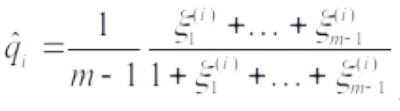

In [17]:
def method_4(m):
    q_sum = 0
    q2_sum = 0
    Q = 0
    sigma = 0
    n = 0
    n_bound = 10
    while n < n_bound:
        n += 1
        un = gen_uniform_values(m-1)
        xi = (-1)* np.log(un)
        s_xi = np.sum(xi)
        q_i = s_xi / ((m-1)*(1+s_xi))
        q2_sum += q_i**2
        q_sum += q_i
        if n>=2:
            Q = q_sum/n
            Q_2 = Q**2
            sigma = (q2_sum - n*(Q_2)) / (n-1)
            n_bound = (sigma/Q_2) * ((Z_gamma/eps)**2)
    return Q, sigma, n_bound, n


for m_i in m[1:]: 
    start = time.time()
    Q, sigma, n_bound, n = method_4(m_i)
    end = time.time()
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("дисперсія=", sigma)
    print("n_bound=", n_bound)
    print("time=", end - start)
    print("-----------------------------")


m= 10
n= 88
Q= 0.0985915191161968
дисперсія= 1.2787271735874599e-05
n_bound= 87.22746360969153
time= 0.010995626449584961
-----------------------------

m= 65
n= 2
Q= 0.015364653793437832
дисперсія= 7.217591140636775e-11
n_bound= 0.020272214164638667
time= 0.0009992122650146484
-----------------------------

m= 100
n= 2
Q= 0.00999784265845088
дисперсія= 3.240755599531568e-11
n_bound= 0.021497509590752105
time= 0.0009980201721191406
-----------------------------

m= 1000
n= 2
Q= 0.0009999833390205736
дисперсія= 1.8068906830828735e-16
n_bound= 1.1981213769702773e-05
time= 0.0009989738464355469
-----------------------------

m= 10000
n= 2
Q= 0.00010000004141347843
дисперсія= 1.4227506535912076e-20
n_bound= 9.433718238804847e-08
time= 0.0030024051666259766
-----------------------------


In [ ]:
########################### інші версії методів 
def MonteCarlo_method_1(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m)
        xi = (-1)* np.log(un)
        w = uniform.rvs() #для знаходження етта
        while w == 0.0: #якщо раптом згенерується w=0
            w = uniform.rvs()
        eta = (1/w) - 1
        
        if eta > np.sum(xi): #індикатор
            q_i = 1
        else: q_i = 0
            
        sigma += q_i**2
        Q += q_i/n
    Q_2 = Q**2
    sigma = (sigma - n*(Q_2)) / (n-1)
    n_bound = (sigma/Q_2) * (Z_gamma/eps)**2
    return Q, sigma, n_bound

def MonteCarlo_method_2(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m)
        xi = (-1)* np.log(un)
        
        q_i = 1 / (np.sum(xi) + 1)
        
        sigma += q_i**2
        Q += q_i/n
    Q_2 = Q**2
    sigma = (sigma - n*(Q_2)) / (n-1)
    n_bound = (sigma/Q_2) * (Z_gamma/eps)**2
    return Q, sigma, n_bound

def MonteCarlo_method_4(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m-1)
        xi = (-1)* np.log(un)
        s_xi = np.sum(xi)
        q_i = s_xi / ((m-1)*(1+s_xi))
        sigma += q_i**2
        Q += q_i/n
    Q_2 = Q**2
    sigma = (sigma - n*(Q_2)) / (n-1)
    n_bound = (sigma/Q_2) * ((Z_gamma/eps)**2)
    return Q, sigma, n_bound


# Q, sigma, n_bound = MonteCarlo_method_4(m_i, n)
# Q, sigma, n_bound = MonteCarlo_method_2(m_i, n)
# Q, sigma, n_bound = MonteCarlo_method_1(m_i, n)